<a href="https://colab.research.google.com/github/DIPANJAN001/TalkJulia_with_Randy/blob/main/compare9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install Boruta
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import concatenate
from keras import Model
from keras.layers import Input
from keras.layers import Bidirectional
from keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_absolute_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
df=pd.read_excel("/content/pv_07.xlsx")
weather_input1=df.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
solpow=df['power_normed']

In [32]:
def lstm_data_transform(x_data, y_data, num_steps):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [33]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input

In [34]:
n_inputs=weather_input.shape[1]

In [35]:
input_data_shape= Input(shape=(n_inputs,))
# encoder level 1
encoder= Dense(n_inputs*2)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 2
encoder= Dense(n_inputs)(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# bottleneck
#n_bottleneck = round(float(n_inputs) / 2.0)
n_bottleneck = 20
bottleneck = Dense(n_bottleneck)(encoder)
# define decoder, level 1
decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(n_inputs*2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [36]:
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [37]:
 model.fit(weather_input,weather_input, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
179/179 - 2s - loss: 0.1015 - 2s/epoch - 13ms/step
Epoch 2/100
179/179 - 1s - loss: 0.0209 - 656ms/epoch - 4ms/step
Epoch 3/100
179/179 - 1s - loss: 0.0165 - 815ms/epoch - 5ms/step
Epoch 4/100
179/179 - 1s - loss: 0.0143 - 693ms/epoch - 4ms/step
Epoch 5/100
179/179 - 1s - loss: 0.0130 - 645ms/epoch - 4ms/step
Epoch 6/100
179/179 - 1s - loss: 0.0121 - 645ms/epoch - 4ms/step
Epoch 7/100
179/179 - 1s - loss: 0.0110 - 654ms/epoch - 4ms/step
Epoch 8/100
179/179 - 1s - loss: 0.0108 - 629ms/epoch - 4ms/step
Epoch 9/100
179/179 - 1s - loss: 0.0101 - 793ms/epoch - 4ms/step
Epoch 10/100
179/179 - 1s - loss: 0.0093 - 1s/epoch - 7ms/step
Epoch 11/100
179/179 - 1s - loss: 0.0092 - 1s/epoch - 7ms/step
Epoch 12/100
179/179 - 1s - loss: 0.0086 - 1s/epoch - 8ms/step
Epoch 13/100
179/179 - 1s - loss: 0.0085 - 1s/epoch - 6ms/step
Epoch 14/100
179/179 - 1s - loss: 0.0088 - 1s/epoch - 7ms/step
Epoch 15/100
179/179 - 1s - loss: 0.0083 - 1s/epoch - 7ms/step
Epoch 16/100
179/179 - 1s - loss: 0.007

In [38]:
# define an encoder model (without the decoder)
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
# save the encoder to file
encoder.save('encoder.h5')

In [39]:
#solpow=solpow.to_numpy().reshape(-1,1)
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(weather_input)

179/179 [==============================] - 0s 2ms/step


In [40]:
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(weather_input)

179/179 [==============================] - 0s 2ms/step


In [41]:
num_steps = 2
# training set
(x_transformed1,
 y_transformed1) = lstm_data_transform(X_train_encode,solpow , num_steps=num_steps)
assert x_transformed1.shape[0] == y_transformed1.shape[0]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x_transformed1, y_transformed1, test_size=0.4, random_state=42,shuffle=False)

In [43]:
inputs1=Input(shape=(X_train.shape[1],X_train.shape[2]))

In [44]:
from keras import optimizers
opt=optimizers.Adam(learning_rate=0.001)

Epoch 1/100
43/43 [==============================] - 22s 92ms/step - loss: 0.0335 - mse: 0.0335 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 2/100
43/43 [==============================] - 2s 40ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 3/100
43/43 [==============================] - 2s 40ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 4/100
43/43 [==============================] - 2s 41ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 5/100
43/43 [==============================] - 2s 40ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 6/100
43/43 [==============================] - 2s 40ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 7/100
43/43 [==============================] - 2s 40ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 8/100
43/43 [==============================] - 2s 40ms/step - loss: 0

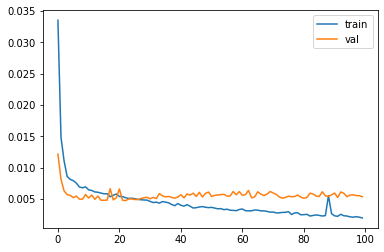

72/72 [==============================] - 2s 9ms/step


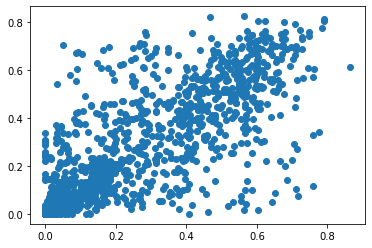

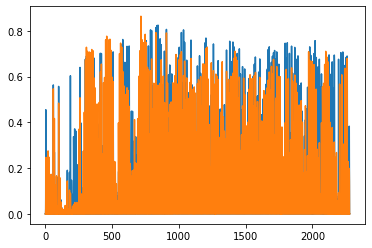

0.11532857064017826
0.0565158232444774


In [45]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.5)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.5)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 100,validation_split=0.2,batch_size =64 )
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

Epoch 1/200
43/43 [==============================] - 15s 80ms/step - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 2/200
43/43 [==============================] - 2s 41ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 3/200
43/43 [==============================] - 2s 42ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 4/200
43/43 [==============================] - 2s 43ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 5/200
43/43 [==============================] - 2s 42ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 6/200
43/43 [==============================] - 2s 43ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 7/200
43/43 [==============================] - 2s 42ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 8/200
43/43 [==============================] - 2s 42ms/step - loss: 0

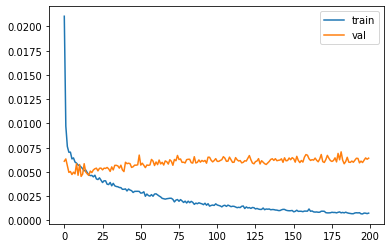

72/72 [==============================] - 2s 8ms/step


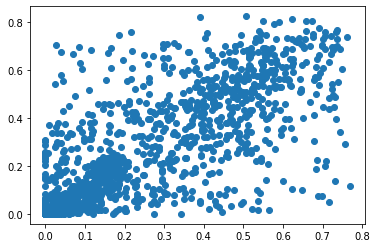

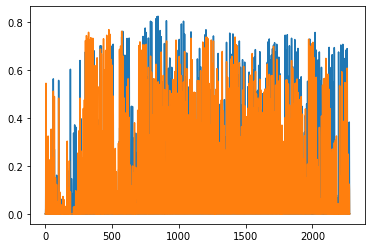

0.12145842549166061
0.0608097986667259


In [46]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

In [47]:
from keras.layers import Bidirectional


Epoch 1/100
43/43 [==============================] - 32s 171ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 2/100
43/43 [==============================] - 4s 87ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 3/100
43/43 [==============================] - 4s 87ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 4/100
43/43 [==============================] - 4s 86ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 5/100
43/43 [==============================] - 4s 86ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 6/100
43/43 [==============================] - 4s 86ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 7/100
43/43 [==============================] - 4s 86ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 8/100
43/43 [==============================] - 4s 86ms/step - loss: 

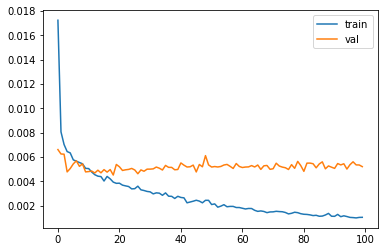

72/72 [==============================] - 4s 17ms/step


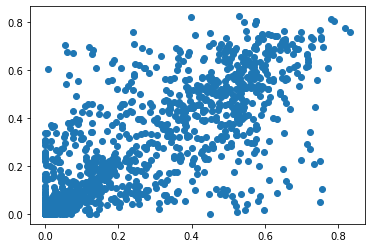

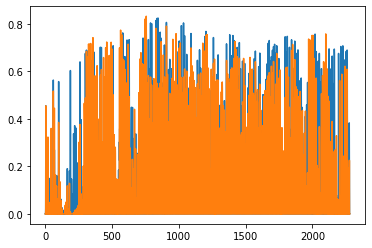

0.11706993619040901
0.05713192033081099


In [48]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs =100,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

Epoch 1/100
43/43 [==============================] - 30s 159ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 2/100
43/43 [==============================] - 4s 87ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 3/100
43/43 [==============================] - 4s 85ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 4/100
43/43 [==============================] - 4s 84ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 5/100
43/43 [==============================] - 4s 86ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 6/100
43/43 [==============================] - 4s 87ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 7/100
43/43 [==============================] - 4s 86ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 8/100
43/43 [==============================] - 4s 87ms/step - loss: 

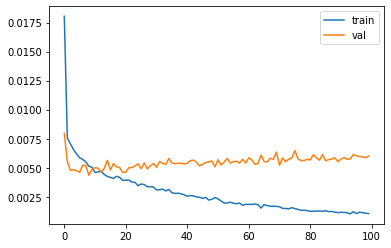

72/72 [==============================] - 4s 15ms/step


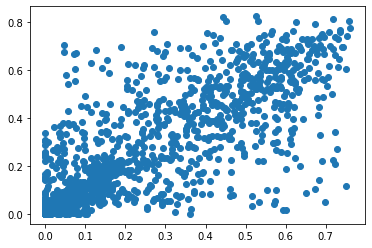

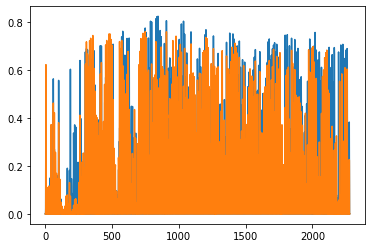

0.11514575712756248
0.05643323407890837


In [49]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  #output = layers.average([ out1_1, out2_1, out3_1])
  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs =100,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

In [50]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout

In [51]:
SimRNN=Sequential()
SimRNN.add(SimpleRNN(20,return_sequences=True,input_shape=(2,20)))
SimRNN.add(SimpleRNN(20,return_sequences=True))
SimRNN.add(SimpleRNN(1))

In [52]:
SimRNN.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
SimRNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 2, 20)             820       
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 2, 20)             820       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 1)                 22        
                                                                 
Total params: 1,662
Trainable params: 1,662
Non-trainable params: 0
_________________________________________________________________


In [53]:
SimRNN.fit(X_train,y_train, epochs=200, batch_size=64, validation_split = 0.2)

Epoch 1/200
43/43 [==============================] - 3s 15ms/step - loss: 0.2363 - mean_absolute_error: 0.2363 - val_loss: 0.1880 - val_mean_absolute_error: 0.1880
Epoch 2/200
43/43 [==============================] - 0s 4ms/step - loss: 0.1291 - mean_absolute_error: 0.1291 - val_loss: 0.1344 - val_mean_absolute_error: 0.1344
Epoch 3/200
43/43 [==============================] - 0s 5ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - val_loss: 0.1118 - val_mean_absolute_error: 0.1118
Epoch 4/200
43/43 [==============================] - 0s 4ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - val_loss: 0.1008 - val_mean_absolute_error: 0.1008
Epoch 5/200
43/43 [==============================] - 0s 5ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - val_loss: 0.0904 - val_mean_absolute_error: 0.0904
Epoch 6/200
43/43 [==============================] - 0s 5ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - val_loss: 0.0844 - val_mean_absolute_error: 0.0844
Epoch 7/200
43/43 [==

In [54]:
y=SimRNN.predict(X_test)

72/72 [==============================] - 1s 2ms/step


In [55]:
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

0.1100234555368688
0.0584060019994642


In [56]:
regressor1 = Sequential()
regressor1.add(LSTM(units = 50, return_sequences = True, input_shape = (2,20)))
regressor1.add(Dropout(0.2))

regressor1.add(LSTM(units = 50, return_sequences = True))
regressor1.add(Dropout(0.25))

regressor1.add(LSTM(units = 50, return_sequences = True))
regressor1.add(Dropout(0.25))

regressor1.add(LSTM(units = 50))
regressor1.add(Dropout(0.25))

regressor1.add(Dense(units = 1))

regressor1.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor1.fit(X_train, y_train, epochs = 200, batch_size = 64)

Epoch 1/200
54/54 [==============================] - 8s 12ms/step - loss: 0.0274
Epoch 2/200
54/54 [==============================] - 1s 12ms/step - loss: 0.0130
Epoch 3/200
54/54 [==============================] - 1s 11ms/step - loss: 0.0103
Epoch 4/200
54/54 [==============================] - 1s 12ms/step - loss: 0.0090
Epoch 5/200
54/54 [==============================] - 1s 12ms/step - loss: 0.0089
Epoch 6/200
54/54 [==============================] - 1s 11ms/step - loss: 0.0083
Epoch 7/200
54/54 [==============================] - 1s 11ms/step - loss: 0.0075
Epoch 8/200
54/54 [==============================] - 1s 12ms/step - loss: 0.0075
Epoch 9/200
54/54 [==============================] - 1s 11ms/step - loss: 0.0072
Epoch 10/200
54/54 [==============================] - 1s 12ms/step - loss: 0.0065
Epoch 11/200
54/54 [==============================] - 1s 12ms/step - loss: 0.0065
Epoch 12/200
54/54 [==============================] - 1s 11ms/step - loss: 0.0067
Epoch 13/200
54/54 [=====

In [57]:
y=regressor1.predict(X_test)

72/72 [==============================] - 2s 3ms/step


In [58]:
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

0.11634289666430467
0.05902710893475247
